## Assignment 1 

In [127]:
# 1 First we should import our libriaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [191]:
# 2 Creating dataset
np.random.seed(42)

num_sample = 2500

squared_meters = np.random.randint(25,150,size=num_sample)
num_of_rooms = np.random.randint(1,5,size=num_sample)
building_age = np.random.randint(1,10,size=num_sample)

# Creating noice -> 'e'
noice = np.random.randint(0,10000,size=num_sample)

Base_price = 120000
price_per_room = 25000
price_per_squared_meters = 4000
price_decresing_per_age = -10000

price = Base_price + (price_per_room * num_of_rooms) + (squared_meters * price_per_squared_meters) + (building_age * price_decresing_per_age) + noice

data = pd.DataFrame({
    'Number of Rooms': num_of_rooms,
    'Square meters': squared_meters,
    'Building age': building_age,
    'Price': price
})

data.head(10)

,Number of Rooms,Square meters,Building age,Price
0,1,127,9,563240
1,2,76,3,447440
2,4,117,3,662631
3,3,39,2,340599
4,4,131,8,672274
5,2,96,1,549077
6,2,85,8,433768
7,4,45,7,339142
8,4,127,7,665995
9,1,146,3,707802


In [193]:
# 3 Seperation by target and metrics (x,y)

X = data[['Number of Rooms', 'Square meters', 'Building age']]
y = data['Price']

In [195]:
# 4 Separate by [test | learning] samples
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [197]:
# 5 Train part tr
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [199]:
# 6 Making prediction
y_pred = model.predict(X_test)

In [201]:
# 7 Finding the MSE -> Mean Square Error
mse = mean_squared_error(y_test,y_pred)
print('Mean Squered Error is {}'.format(mse))

Mean Squered Error is 7972235.369630763


In [203]:
# 8 Finding the coefficient and interception
print('Model coefficient is -> {}'.format(model.coef_))
print('Interception is -> {}'.format(model.intercept_))

Model coefficient is -> [24968.27187121  4000.27392594 -9981.20849685]
Interception is -> 124898.92808830825


In [205]:
# 9 Comparison between actually price and predicted
comparison_df = pd.DataFrame({
    'Actual price': y_test,
    'Predicted price': y_pred
})
comparison_df.tail(10)

,Actual price,Predicted price
220,497011,494965.792436
2486,412523,410929.538733
1659,430021,429925.327411
527,760223,763881.319895
1486,514802,510850.030232
2375,391480,391855.844783
1609,287454,288854.303660
596,418930,418041.363541
84,565264,562900.995283
2213,375800,373951.993706


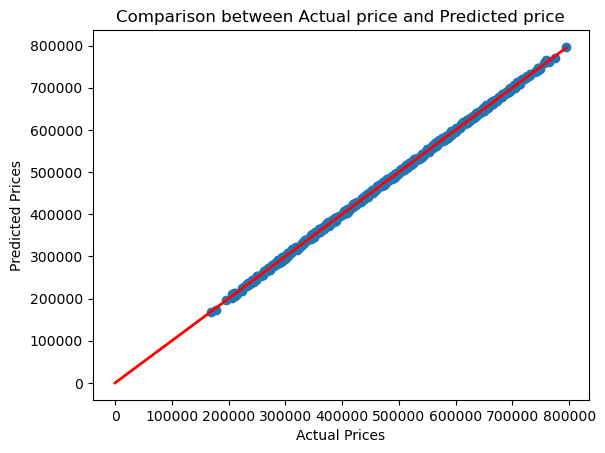

In [207]:
# 10 Data visualisation with Matplotlib
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison between Actual price and Predicted price')
plt.plot([0,max(y_test)],[0,max(y_test)], color='red',linewidth=2)
plt.show()